In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

%matplotlib inline

### 加载训练数据

In [2]:
x = pd.read_csv('logistic_x.txt',sep='\ +',header=None,engine='python')
y = pd.read_csv('logistic_y.txt',sep='\ +',header=None,engine='python')
y = y.astype(int)
x['label'] = y[0].values
x

,0,1,label
0,1.343250,-1.331148,0
1,1.820553,-0.634668,0
2,0.986321,-1.888576,0
3,1.944373,-1.635452,0
4,0.976734,-1.353315,0
5,1.945858,-2.044328,0
6,2.107515,-2.125668,0
7,2.070373,-2.463410,0
8,0.868650,-2.411935,0
9,1.800659,-2.773969,0


In [3]:
#99个样本，每个样本两个属性，对应一个标签
# print(x)
# print(y)

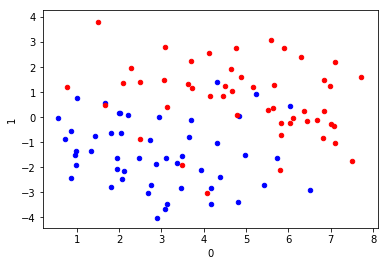

In [4]:
#查看数据的分布
ax = plt.axes()
x.query('label == 0').plot.scatter(x=0, y=1, ax=ax, color='blue')
x.query('label == 1').plot.scatter(x=0, y=1, ax=ax, color='red')

In [5]:
#把数据从pandas框架格式转成numpy的ndarray以供计算
gt_x = x[[0,1]].values
gt_x = np.hstack([np.ones((gt_x.shape[0],1)),gt_x])
gt_y = x['label'].values
gt_y = gt_y.reshape(-1,1)#把y转换成和x一样的ndarray，且以列的形式排列
# print(gt_x)
# print(gt_y)
# gt_y.shape

### 梯度下降法求解

In [6]:
class LGR_GD():
    def __init__(self):
        self.m = None
        self.w = None
    
    def init_detail(self,x):
        [m,d] = np.shape(x)#m是样本个数，d是特征个数
        self.m = m
        self.w = np.zeros((1,d))#w的维度应该对应特征个数
            
    def sigmoid(self,x):
        wtx =  np.dot(x,self.w.T)#嵌套的线性模型的y值
        h_w = 1/(1 + np.exp(-wtx))
        return h_w   
        
    def loss(self,x,y):
        loss = 0
        h_w = self.sigmoid(x)
        loss = np.dot(y.T,np.log(h_w)) + np.dot((1-y).T,np.log(1-h_w))
        loss = -np.sum(loss)/self.m
        return loss
    
    def cal_gradient(self,x,y,lr):
        d = self.w.shape[1]
        dw = np.zeros((1,d))
        h_w = self.sigmoid(x)
        
        dw = -np.dot((y-h_w).T,x)/self.m#这里拜托自己手动推倒一遍
        self.w = self.w - lr*dw
        
    
    def train(self,x,y,lr,max_iter):
        self.init_detail(x)
        for i in range(max_iter):
            self.cal_gradient(x,y,lr)
            loss = self.loss(x,y)
            print('loss:{}'.format(loss))
        print("w:{}".format(self.w))

    def predict(self,x):
        y_pred = x.dot(self.w)
        return y_pred

In [7]:
lgr_gd = LGR_GD()
lgr_gd.train(gt_x,gt_y,0.05,50000)

loss:0.667726193022424
loss:0.6473495869980709
loss:0.6302469591291987
loss:0.6153890508495127
loss:0.6021688429788606
loss:0.5902166449340738
loss:0.5792967013645992
loss:0.5692499999499887
loss:0.5599625928285104
loss:0.5513479128633907
loss:0.5433367795998656
loss:0.535871653407094
loss:0.5289032536633345
loss:0.5223885041815746
loss:0.5162892321527478
loss:0.5105713013592125
loss:0.5052040009897537
loss:0.5001595893992009
loss:0.495412935610855
loss:0.49094122564495385
loss:0.4867237143721735
loss:0.48274151125566617
loss:0.478977392685549
loss:0.4754156360920743
loss:0.4720418724668512
loss:0.4688429547827982
loss:0.4658068403381821
loss:0.46292248540022546
loss:0.4601797507682586
loss:0.4575693170589357
loss:0.45508260866080136
loss:0.4527117254258061
loss:0.45044938126870426
loss:0.44828884893580034
loss:0.4462239102847874
loss:0.44424881148896667
loss:0.4423582226430725
loss:0.4405472013050619
loss:0.43881115955924865
loss:0.43714583423167636
loss:0.4355472599291732
loss:0.4340

loss:0.33684200372345896
loss:0.33682654559865916
loss:0.3368111210410787
loss:0.33679572997076057
loss:0.3367803723079575
loss:0.3367650479731317
loss:0.3367497568869542
loss:0.3367344989703041
loss:0.336719274144268
loss:0.33670408233013976
loss:0.3366889234494192
loss:0.33667379742381226
loss:0.3366587041752299
loss:0.33664364362578786
loss:0.3366286156978058
loss:0.3366136203138067
loss:0.33659865739651673
loss:0.336583726868864
loss:0.3365688286539786
loss:0.33655396267519144
loss:0.3365391288560344
loss:0.3365243271202389
loss:0.336509557391736
loss:0.3364948195946554
loss:0.3364801136533256
loss:0.33646543949227214
loss:0.33645079703621805
loss:0.3364361862100829
loss:0.33642160693898215
loss:0.33640705914822694
loss:0.336392542763323
loss:0.3363780577099707
loss:0.33636360391406395
loss:0.33634918130169017
loss:0.3363347897991291
loss:0.33632042933285283
loss:0.3363060998295253
loss:0.33629180121600083
loss:0.3362775334193248
loss:0.3362632963667322
loss:0.33624908998564773
los

loss:0.3307766659085205
loss:0.3307736914638469
loss:0.3307707226888776
loss:0.3307677595721584
loss:0.33076480210225945
loss:0.33076185026777666
loss:0.3307589040573296
loss:0.3307559634595635
loss:0.3307530284631477
loss:0.3307500990567764
loss:0.3307471752291684
loss:0.33074425696906684
loss:0.3307413442652392
loss:0.3307384371064778
loss:0.33073553548159884
loss:0.3307326393794429
loss:0.3307297487888748
loss:0.3307268636987835
loss:0.3307239840980821
loss:0.33072110997570764
loss:0.3307182413206213
loss:0.330715378121808
loss:0.33071252036827664
loss:0.33070966804905977
loss:0.33070682115321404
loss:0.3307039796698194
loss:0.33070114358797975
loss:0.33069831289682233
loss:0.33069548758549816
loss:0.3306926676431816
loss:0.3306898530590703
loss:0.33068704382238556
loss:0.33068423992237167
loss:0.3306814413482966
loss:0.330678648089451
loss:0.33067586013514916
loss:0.3306730774747282
loss:0.3306703000975482
loss:0.3306675279929924
loss:0.3306647611504669
loss:0.33066199955940073
los

loss:0.3296837031160046
loss:0.329682761144119
loss:0.3296818208708387
loss:0.329680882292985
loss:0.3296799454073858
loss:0.3296790102108753
loss:0.3296780767002935
loss:0.3296771448724871
loss:0.32967621472430847
loss:0.3296752862526167
loss:0.3296743594542769
loss:0.32967343432616
loss:0.3296725108651435
loss:0.32967158906811084
loss:0.3296706689319516
loss:0.32966975045356156
loss:0.32966883362984245
loss:0.32966791845770216
loss:0.3296670049340547
loss:0.3296660930558201
loss:0.32966518281992435
loss:0.32966427422329964
loss:0.3296633672628841
loss:0.3296624619356217
loss:0.3296615582384627
loss:0.3296606561683633
loss:0.32965975572228523
loss:0.329658856897197
loss:0.3296579596900724
loss:0.3296570640978911
loss:0.3296561701176393
loss:0.3296552777463087
loss:0.32965438698089666
loss:0.329653497818407
loss:0.3296526102558491
loss:0.32965172429023804
loss:0.32965083991859506
loss:0.3296499571379471
loss:0.3296490759453269
loss:0.32964819633777304
loss:0.3296473183123299
loss:0.329

loss:0.329242958655157
loss:0.32924279603926004
loss:0.32924263370340545
loss:0.3292424716471028
loss:0.32924230986986247
loss:0.32924214837119575
loss:0.3292419871506147
loss:0.32924182620763254
loss:0.329241665541763
loss:0.32924150515252093
loss:0.32924134503942193
loss:0.3292411852019826
loss:0.32924102563972024
loss:0.32924086635215305
loss:0.32924070733880034
loss:0.3292405485991818
loss:0.32924039013281864
loss:0.32924023193923213
loss:0.3292400740179451
loss:0.3292399163684809
loss:0.3292397589903637
loss:0.3292396018831187
loss:0.32923944504627184
loss:0.32923928847934997
loss:0.3292391321818806
loss:0.3292389761533924
loss:0.3292388203934148
loss:0.32923866490147774
loss:0.3292385096771125
loss:0.32923835471985075
loss:0.32923820002922527
loss:0.32923804560476966
loss:0.32923789144601845
loss:0.3292377375525065
loss:0.32923758392377034
loss:0.32923743055934646
loss:0.32923727745877274
loss:0.32923712462158766
loss:0.32923697204733054
loss:0.3292368197355418
loss:0.32923666768

loss:0.32916504367469085
loss:0.32916501409212745
loss:0.3291649845595043
loss:0.32916495507673615
loss:0.32916492564373856
loss:0.3291648962604266
loss:0.3291648669267158
loss:0.3291648376425219
loss:0.32916480840776075
loss:0.32916477922234805
loss:0.32916475008620005
loss:0.329164720999233
loss:0.32916469196136305
loss:0.32916466297250696
loss:0.32916463403258134
loss:0.32916460514150275
loss:0.32916457629918844
loss:0.3291645475055553
loss:0.32916451876052055
loss:0.3291644900640017
loss:0.3291644614159161
loss:0.32916443281618146
loss:0.3291644042647155
loss:0.3291643757614364
loss:0.32916434730626193
loss:0.3291643188991105
loss:0.3291642905399004
loss:0.32916426222855005
loss:0.32916423396497824
loss:0.32916420574910366
loss:0.32916417758084515
loss:0.3291641494601219
loss:0.329164121386853
loss:0.329164093360958
loss:0.32916406538235604
loss:0.3291640374509669
loss:0.32916400956671027
loss:0.3291639817295062
loss:0.32916395393927456
loss:0.32916392619593543
loss:0.3291638984994

loss:0.3291507339567301
loss:0.3291507284413573
loss:0.3291507229352155
loss:0.3291507174382891
loss:0.32915071195056256
loss:0.32915070647202055
loss:0.3291507010026476
loss:0.32915069554242826
loss:0.32915069009134706
loss:0.32915068464938896
loss:0.3291506792165384
loss:0.3291506737927803
loss:0.3291506683780992
loss:0.3291506629724798
loss:0.3291506575759071
loss:0.32915065218836587
loss:0.3291506468098408
loss:0.32915064144031686
loss:0.32915063607977907
loss:0.32915063072821193
loss:0.32915062538560086
loss:0.32915062005193046
loss:0.32915061472718593
loss:0.32915060941135216
loss:0.32915060410441427
loss:0.3291505988063574
loss:0.32915059351716647
loss:0.3291505882368267
loss:0.32915058296532307
loss:0.32915057770264106
loss:0.32915057244876555
loss:0.3291505672036819
loss:0.3291505619673753
loss:0.3291505567398312
loss:0.3291505515210347
loss:0.32915054631097107
loss:0.32915054110962566
loss:0.329150535916984
loss:0.3291505307330314
loss:0.3291505255577532
loss:0.32915052039113

loss:0.329148053637147
loss:0.329148052600451
loss:0.3291480515654835
loss:0.3291480505322417
loss:0.32914804950072274
loss:0.3291480484709237
loss:0.3291480474428418
loss:0.32914804641647405
loss:0.32914804539181775
loss:0.3291480443688698
loss:0.3291480433476275
loss:0.3291480423280881
loss:0.32914804131024844
loss:0.3291480402941061
loss:0.32914803927965786
loss:0.3291480382669011
loss:0.32914803725583297
loss:0.3291480362464506
loss:0.3291480352387513
loss:0.3291480342327321
loss:0.32914803322839026
loss:0.32914803222572303
loss:0.3291480312247276
loss:0.329148030225401
loss:0.32914802922774067
loss:0.32914802823174377
loss:0.3291480272374075
loss:0.3291480262447291
loss:0.32914802525370573
loss:0.32914802426433476
loss:0.3291480232766133
loss:0.3291480222905387
loss:0.32914802130610804
loss:0.3291480203233188
loss:0.32914801934216825
loss:0.32914801836265334
loss:0.3291480173847716
loss:0.3291480164085203
loss:0.32914801543389666
loss:0.329148014460898
loss:0.32914801348952144
los

loss:0.3291475490967573
loss:0.3291475489007378
loss:0.3291475487050445
loss:0.329147548509677
loss:0.32914754831463466
loss:0.3291475481199171
loss:0.32914754792552364
loss:0.32914754773145377
loss:0.329147547537707
loss:0.3291475473442827
loss:0.3291475471511804
loss:0.3291475469583996
loss:0.3291475467659396
loss:0.3291475465738001
loss:0.3291475463819804
loss:0.32914754619048
loss:0.3291475459992984
loss:0.329147545808435
loss:0.3291475456178895
loss:0.32914754542766106
loss:0.3291475452377493
loss:0.32914754504815374
loss:0.32914754485887376
loss:0.3291475446699087
loss:0.3291475444812583
loss:0.32914754429292203
loss:0.3291475441048992
loss:0.3291475439171893
loss:0.32914754372979205
loss:0.3291475435427066
loss:0.3291475433559326
loss:0.3291475431694696
loss:0.32914754298331694
loss:0.3291475427974741
loss:0.3291475426119407
loss:0.32914754242671607
loss:0.3291475422417998
loss:0.3291475420571914
loss:0.32914754187289025
loss:0.3291475416888959
loss:0.3291475415052078
loss:0.329

loss:0.3291474535842164
loss:0.3291474535471461
loss:0.32914745351013747
loss:0.3291474534731906
loss:0.32914745343630486
loss:0.32914745339948076
loss:0.32914745336271783
loss:0.32914745332601597
loss:0.3291474532893752
loss:0.3291474532527955
loss:0.3291474532162765
loss:0.32914745317981836
loss:0.32914745314342087
loss:0.3291474531070838
loss:0.3291474530708073
loss:0.3291474530345911
loss:0.3291474529984351
loss:0.3291474529623394
loss:0.3291474529263036
loss:0.32914745289032776
loss:0.3291474528544118
loss:0.32914745281855556
loss:0.329147452782759
loss:0.32914745274702195
loss:0.3291474527113443
loss:0.3291474526757261
loss:0.3291474526401671
loss:0.3291474526046674
loss:0.3291474525692265
loss:0.32914745253384475
loss:0.32914745249852173
loss:0.32914745246325755
loss:0.3291474524280519
loss:0.329147452392905
loss:0.32914745235781645
loss:0.32914745232278636
loss:0.32914745228781445
loss:0.3291474522529008
loss:0.32914745221804514
loss:0.32914745218324754
loss:0.3291474521485077


loss:0.3291474355220889
loss:0.329147435515061
loss:0.32914743550804487
loss:0.3291474355010403
loss:0.32914743549404746
loss:0.32914743548706626
loss:0.32914743548009656
loss:0.3291474354731385
loss:0.3291474354661921
loss:0.3291474354592572
loss:0.3291474354523338
loss:0.3291474354454219
loss:0.32914743543852154
loss:0.32914743543163266
loss:0.3291474354247552
loss:0.32914743541788916
loss:0.32914743541103464
loss:0.3291474354041915
loss:0.32914743539735963
loss:0.32914743539053926
loss:0.32914743538373015
loss:0.32914743537693236
loss:0.32914743537014585
loss:0.32914743536337066
loss:0.3291474353566068
loss:0.32914743534985413
loss:0.32914743534311264
loss:0.32914743533638247
loss:0.3291474353296634
loss:0.3291474353229555
loss:0.3291474353162589
loss:0.3291474353095733
loss:0.3291474353028988
loss:0.3291474352962354
loss:0.3291474352895831
loss:0.3291474352829419
loss:0.3291474352763118
loss:0.32914743526969265
loss:0.32914743526308443
loss:0.3291474352564874
loss:0.329147435249901

loss:0.32914743209597713
loss:0.32914743209464664
loss:0.32914743209331815
loss:0.32914743209199193
loss:0.32914743209066805
loss:0.3291474320893462
loss:0.32914743208802666
loss:0.3291474320867092
loss:0.3291474320853941
loss:0.329147432084081
loss:0.32914743208277014
loss:0.3291474320814615
loss:0.329147432080155
loss:0.3291474320788508
loss:0.3291474320775487
loss:0.32914743207624875
loss:0.3291474320749509
loss:0.32914743207365527
loss:0.3291474320723618
loss:0.3291474320710704
loss:0.32914743206978125
loss:0.32914743206849423
loss:0.32914743206720926
loss:0.3291474320659265
loss:0.3291474320646458
loss:0.32914743206336733
loss:0.329147432062091
loss:0.32914743206081676
loss:0.32914743205954455
loss:0.32914743205827446
loss:0.3291474320570066
loss:0.3291474320557408
loss:0.32914743205447705
loss:0.32914743205321556
loss:0.32914743205195596
loss:0.32914743205069846
loss:0.3291474320494432
loss:0.3291474320481901
loss:0.32914743204693886
loss:0.3291474320456898
loss:0.329147432044442

loss:0.3291474314743974
loss:0.32914743147410025
loss:0.32914743147380365
loss:0.32914743147350756
loss:0.3291474314732119
loss:0.32914743147291686
loss:0.3291474314726222
loss:0.32914743147232806
loss:0.32914743147203435
loss:0.3291474314717413
loss:0.32914743147144854
loss:0.3291474314711564
loss:0.32914743147086467
loss:0.32914743147057346
loss:0.3291474314702827
loss:0.32914743146999254
loss:0.3291474314697026
loss:0.3291474314694134
loss:0.32914743146912456
loss:0.32914743146883624
loss:0.32914743146854847
loss:0.3291474314682611
loss:0.3291474314679742
loss:0.32914743146768777
loss:0.32914743146740183
loss:0.3291474314671164
loss:0.3291474314668314
loss:0.3291474314665469
loss:0.3291474314662628
loss:0.32914743146597925
loss:0.3291474314656962
loss:0.3291474314654136
loss:0.3291474314651313
loss:0.32914743146484976
loss:0.3291474314645685
loss:0.3291474314642877
loss:0.3291474314640075
loss:0.32914743146372777
loss:0.32914743146344827
loss:0.3291474314631694
loss:0.32914743146289

loss:0.3291474313617706
loss:0.3291474313616608
loss:0.3291474313615512
loss:0.3291474313614416
loss:0.32914743136133234
loss:0.32914743136122326
loss:0.3291474313611144
loss:0.32914743136100566
loss:0.329147431360897
loss:0.3291474313607888
loss:0.3291474313606805
loss:0.32914743136057245
loss:0.32914743136046465
loss:0.329147431360357
loss:0.3291474313602495
loss:0.32914743136014213
loss:0.3291474313600351
loss:0.3291474313599281
loss:0.3291474313598213
loss:0.32914743135971475
loss:0.32914743135960833
loss:0.3291474313595021
loss:0.32914743135939606
loss:0.32914743135929014
loss:0.3291474313591844
loss:0.32914743135907887
loss:0.32914743135897356
loss:0.32914743135886837
loss:0.32914743135876334
loss:0.3291474313586586
loss:0.32914743135855395
loss:0.3291474313584494
loss:0.3291474313583451
loss:0.329147431358241
loss:0.329147431358137
loss:0.3291474313580332
loss:0.3291474313579297
loss:0.32914743135782615
loss:0.3291474313577229
loss:0.32914743135761976
loss:0.32914743135751684
lo

loss:0.32914743130824303
loss:0.32914743130822216
loss:0.32914743130820134
loss:0.32914743130818064
loss:0.3291474313081599
loss:0.3291474313081393
loss:0.3291474313081185
loss:0.32914743130809787
loss:0.32914743130807733
loss:0.32914743130805674
loss:0.3291474313080362
loss:0.32914743130801566
loss:0.3291474313079953
loss:0.3291474313079749
loss:0.3291474313079545
loss:0.32914743130793417
loss:0.32914743130791374
loss:0.32914743130789353
loss:0.3291474313078733
loss:0.32914743130785307
loss:0.3291474313078328
loss:0.32914743130781265
loss:0.32914743130779256
loss:0.3291474313077725
loss:0.3291474313077524
loss:0.3291474313077325
loss:0.32914743130771246
loss:0.3291474313076925
loss:0.3291474313076726
loss:0.32914743130765267
loss:0.3291474313076328
loss:0.32914743130761304
loss:0.3291474313075932
loss:0.3291474313075734
loss:0.32914743130755375
loss:0.3291474313075341
loss:0.32914743130751445
loss:0.32914743130749474
loss:0.32914743130747526
loss:0.32914743130745566
loss:0.32914743130

loss:0.32914743129808516
loss:0.3291474312980812
loss:0.3291474312980773
loss:0.3291474312980734
loss:0.32914743129806945
loss:0.3291474312980655
loss:0.3291474312980616
loss:0.32914743129805774
loss:0.32914743129805374
loss:0.32914743129804985
loss:0.32914743129804597
loss:0.3291474312980421
loss:0.32914743129803825
loss:0.3291474312980344
loss:0.3291474312980305
loss:0.32914743129802676
loss:0.3291474312980228
loss:0.329147431298019
loss:0.3291474312980151
loss:0.32914743129801133
loss:0.3291474312980075
loss:0.3291474312980036
loss:0.32914743129799984
loss:0.329147431297996
loss:0.32914743129799223
loss:0.3291474312979884
loss:0.3291474312979847
loss:0.32914743129798096
loss:0.32914743129797713
loss:0.32914743129797336
loss:0.32914743129796964
loss:0.3291474312979658
loss:0.32914743129796215
loss:0.3291474312979584
loss:0.3291474312979546
loss:0.32914743129795093
loss:0.3291474312979472
loss:0.3291474312979435
loss:0.3291474312979398
loss:0.329147431297936
loss:0.32914743129793245
l

loss:0.3291474312961622
loss:0.3291474312961615
loss:0.32914743129616075
loss:0.32914743129616
loss:0.32914743129615925
loss:0.32914743129615837
loss:0.32914743129615776
loss:0.3291474312961569
loss:0.3291474312961563
loss:0.3291474312961555
loss:0.3291474312961548
loss:0.3291474312961541
loss:0.32914743129615326
loss:0.32914743129615265
loss:0.3291474312961518
loss:0.32914743129615115
loss:0.3291474312961503
loss:0.3291474312961496
loss:0.3291474312961489
loss:0.3291474312961482
loss:0.3291474312961475
loss:0.32914743129614676
loss:0.32914743129614604
loss:0.3291474312961453
loss:0.3291474312961446
loss:0.3291474312961439
loss:0.32914743129614316
loss:0.3291474312961424
loss:0.3291474312961417
loss:0.32914743129614094
loss:0.32914743129614027
loss:0.32914743129613955
loss:0.32914743129613877
loss:0.32914743129613816
loss:0.32914743129613744
loss:0.32914743129613677
loss:0.32914743129613605
loss:0.3291474312961353
loss:0.3291474312961346
loss:0.329147431296134
loss:0.32914743129613316


loss:0.32914743129579727
loss:0.3291474312957971
loss:0.329147431295797
loss:0.3291474312957969
loss:0.3291474312957967
loss:0.32914743129579654
loss:0.3291474312957964
loss:0.3291474312957962
loss:0.32914743129579616
loss:0.329147431295796
loss:0.3291474312957959
loss:0.3291474312957957
loss:0.32914743129579566
loss:0.3291474312957955
loss:0.3291474312957954
loss:0.3291474312957952
loss:0.32914743129579505
loss:0.32914743129579493
loss:0.32914743129579477
loss:0.32914743129579466
loss:0.3291474312957945
loss:0.3291474312957943
loss:0.3291474312957942
loss:0.32914743129579405
loss:0.32914743129579394
loss:0.32914743129579377
loss:0.3291474312957936
loss:0.32914743129579355
loss:0.3291474312957933
loss:0.32914743129579327
loss:0.3291474312957931
loss:0.329147431295793
loss:0.3291474312957928
loss:0.3291474312957927
loss:0.32914743129579255
loss:0.3291474312957925
loss:0.3291474312957923
loss:0.3291474312957921
loss:0.32914743129579205
loss:0.3291474312957919
loss:0.32914743129579177
los

loss:0.32914743129572815
loss:0.32914743129572815
loss:0.32914743129572815
loss:0.3291474312957281
loss:0.32914743129572804
loss:0.32914743129572804
loss:0.32914743129572804
loss:0.32914743129572804
loss:0.32914743129572804
loss:0.32914743129572793
loss:0.3291474312957279
loss:0.3291474312957279
loss:0.3291474312957279
loss:0.3291474312957279
loss:0.3291474312957278
loss:0.3291474312957278
loss:0.32914743129572777
loss:0.32914743129572777
loss:0.32914743129572777
loss:0.32914743129572777
loss:0.3291474312957276
loss:0.3291474312957276
loss:0.3291474312957276
loss:0.32914743129572754
loss:0.3291474312957276
loss:0.32914743129572743
loss:0.32914743129572743
loss:0.32914743129572754
loss:0.32914743129572743
loss:0.32914743129572743
loss:0.32914743129572743
loss:0.3291474312957273
loss:0.3291474312957273
loss:0.3291474312957273
loss:0.3291474312957273
loss:0.3291474312957273
loss:0.32914743129572727
loss:0.32914743129572716
loss:0.32914743129572716
loss:0.32914743129572716
loss:0.329147431

loss:0.3291474312957151
loss:0.32914743129571505
loss:0.3291474312957151
loss:0.3291474312957151
loss:0.32914743129571505
loss:0.3291474312957151
loss:0.32914743129571505
loss:0.32914743129571494
loss:0.32914743129571505
loss:0.32914743129571505
loss:0.32914743129571505
loss:0.32914743129571494
loss:0.32914743129571505
loss:0.32914743129571494
loss:0.32914743129571494
loss:0.32914743129571494
loss:0.32914743129571494
loss:0.32914743129571494
loss:0.32914743129571494
loss:0.32914743129571494
loss:0.32914743129571494
loss:0.32914743129571494
loss:0.32914743129571494
loss:0.32914743129571494
loss:0.32914743129571494
loss:0.3291474312957149
loss:0.32914743129571494
loss:0.32914743129571494
loss:0.3291474312957149
loss:0.32914743129571494
loss:0.32914743129571494
loss:0.32914743129571494
loss:0.32914743129571494
loss:0.3291474312957149
loss:0.3291474312957149
loss:0.32914743129571494
loss:0.32914743129571494
loss:0.3291474312957149
loss:0.3291474312957149
loss:0.3291474312957149
loss:0.3291

loss:0.3291474312957125
loss:0.3291474312957126
loss:0.3291474312957126
loss:0.3291474312957126
loss:0.32914743129571267
loss:0.3291474312957126
loss:0.3291474312957126
loss:0.3291474312957125
loss:0.32914743129571267
loss:0.3291474312957126
loss:0.3291474312957125
loss:0.3291474312957125
loss:0.3291474312957125
loss:0.3291474312957125
loss:0.3291474312957126
loss:0.3291474312957126
loss:0.3291474312957126
loss:0.3291474312957126
loss:0.3291474312957126
loss:0.3291474312957125
loss:0.3291474312957126
loss:0.3291474312957125
loss:0.3291474312957126
loss:0.3291474312957125
loss:0.3291474312957125
loss:0.3291474312957125
loss:0.3291474312957126
loss:0.3291474312957126
loss:0.3291474312957125
loss:0.3291474312957125
loss:0.3291474312957125
loss:0.3291474312957125
loss:0.3291474312957125
loss:0.3291474312957126
loss:0.3291474312957126
loss:0.3291474312957125
loss:0.3291474312957126
loss:0.3291474312957125
loss:0.3291474312957125
loss:0.3291474312957125
loss:0.3291474312957125
loss:0.3291474

loss:0.3291474312957121
loss:0.3291474312957121
loss:0.32914743129571217
loss:0.32914743129571217
loss:0.3291474312957121
loss:0.3291474312957121
loss:0.3291474312957121
loss:0.3291474312957121
loss:0.3291474312957121
loss:0.3291474312957121
loss:0.3291474312957121
loss:0.3291474312957121
loss:0.3291474312957121
loss:0.3291474312957121
loss:0.3291474312957121
loss:0.3291474312957121
loss:0.3291474312957121
loss:0.3291474312957121
loss:0.3291474312957121
loss:0.3291474312957121
loss:0.3291474312957121
loss:0.3291474312957121
loss:0.3291474312957121
loss:0.3291474312957121
loss:0.3291474312957121
loss:0.3291474312957121
loss:0.3291474312957121
loss:0.32914743129571217
loss:0.3291474312957121
loss:0.3291474312957121
loss:0.3291474312957121
loss:0.3291474312957121
loss:0.3291474312957121
loss:0.3291474312957121
loss:0.32914743129571217
loss:0.3291474312957121
loss:0.3291474312957121
loss:0.3291474312957121
loss:0.3291474312957121
loss:0.3291474312957121
loss:0.3291474312957121
loss:0.32914

loss:0.3291474312957121
loss:0.3291474312957121
loss:0.329147431295712
loss:0.329147431295712
loss:0.329147431295712
loss:0.329147431295712
loss:0.329147431295712
loss:0.329147431295712
loss:0.329147431295712
loss:0.329147431295712
loss:0.329147431295712
loss:0.329147431295712
loss:0.329147431295712
loss:0.329147431295712
loss:0.32914743129571195
loss:0.3291474312957121
loss:0.329147431295712
loss:0.329147431295712
loss:0.3291474312957121
loss:0.329147431295712
loss:0.32914743129571195
loss:0.3291474312957121
loss:0.3291474312957121
loss:0.329147431295712
loss:0.329147431295712
loss:0.329147431295712
loss:0.32914743129571195
loss:0.329147431295712
loss:0.329147431295712
loss:0.329147431295712
loss:0.3291474312957121
loss:0.329147431295712
loss:0.3291474312957121
loss:0.329147431295712
loss:0.32914743129571195
loss:0.329147431295712
loss:0.32914743129571195
loss:0.329147431295712
loss:0.3291474312957121
loss:0.3291474312957121
loss:0.3291474312957121
loss:0.32914743129571195
loss:0.3291

loss:0.329147431295712
loss:0.329147431295712
loss:0.329147431295712
loss:0.329147431295712
loss:0.329147431295712
loss:0.329147431295712
loss:0.329147431295712
loss:0.329147431295712
loss:0.329147431295712
loss:0.329147431295712
loss:0.3291474312957121
loss:0.329147431295712
loss:0.329147431295712
loss:0.3291474312957121
loss:0.3291474312957121
loss:0.3291474312957121
loss:0.3291474312957121
loss:0.32914743129571195
loss:0.329147431295712
loss:0.329147431295712
loss:0.3291474312957121
loss:0.32914743129571195
loss:0.329147431295712
loss:0.329147431295712
loss:0.32914743129571195
loss:0.3291474312957121
loss:0.329147431295712
loss:0.329147431295712
loss:0.3291474312957121
loss:0.329147431295712
loss:0.329147431295712
loss:0.32914743129571195
loss:0.329147431295712
loss:0.3291474312957121
loss:0.329147431295712
loss:0.329147431295712
loss:0.329147431295712
loss:0.329147431295712
loss:0.329147431295712
loss:0.32914743129571195
loss:0.32914743129571195
loss:0.329147431295712
loss:0.329147

loss:0.32914743129571195
loss:0.32914743129571195
loss:0.32914743129571195
loss:0.32914743129571195
loss:0.3291474312957121
loss:0.32914743129571195
loss:0.329147431295712
loss:0.329147431295712
loss:0.329147431295712
loss:0.329147431295712
loss:0.329147431295712
loss:0.3291474312957121
loss:0.32914743129571195
loss:0.3291474312957121
loss:0.329147431295712
loss:0.329147431295712
loss:0.32914743129571195
loss:0.329147431295712
loss:0.329147431295712
loss:0.32914743129571195
loss:0.329147431295712
loss:0.32914743129571195
loss:0.329147431295712
loss:0.329147431295712
loss:0.32914743129571195
loss:0.3291474312957121
loss:0.329147431295712
loss:0.32914743129571195
loss:0.32914743129571195
loss:0.329147431295712
loss:0.329147431295712
loss:0.329147431295712
loss:0.329147431295712
loss:0.32914743129571195
loss:0.32914743129571195
loss:0.329147431295712
loss:0.329147431295712
loss:0.329147431295712
loss:0.329147431295712
loss:0.329147431295712
loss:0.329147431295712
loss:0.32914743129571195


loss:0.32914743129571195
loss:0.3291474312957121
loss:0.329147431295712
loss:0.329147431295712
loss:0.32914743129571195
loss:0.32914743129571195
loss:0.32914743129571195
loss:0.32914743129571195
loss:0.329147431295712
loss:0.329147431295712
loss:0.32914743129571195
loss:0.32914743129571195
loss:0.32914743129571195
loss:0.3291474312957121
loss:0.329147431295712
loss:0.32914743129571195
loss:0.329147431295712
loss:0.32914743129571195
loss:0.329147431295712
loss:0.3291474312957121
loss:0.3291474312957121
loss:0.32914743129571195
loss:0.32914743129571195
loss:0.32914743129571195
loss:0.3291474312957121
loss:0.3291474312957121
loss:0.329147431295712
loss:0.329147431295712
loss:0.329147431295712
loss:0.32914743129571195
loss:0.32914743129571195
loss:0.329147431295712
loss:0.32914743129571195
loss:0.32914743129571195
loss:0.329147431295712
loss:0.32914743129571195
loss:0.32914743129571195
loss:0.32914743129571195
loss:0.329147431295712
loss:0.329147431295712
loss:0.329147431295712
loss:0.3291

loss:0.3291474312957121
loss:0.329147431295712
loss:0.329147431295712
loss:0.32914743129571195
loss:0.329147431295712
loss:0.3291474312957121
loss:0.329147431295712
loss:0.32914743129571195
loss:0.329147431295712
loss:0.329147431295712
loss:0.32914743129571195
loss:0.329147431295712
loss:0.329147431295712
loss:0.329147431295712
loss:0.3291474312957121
loss:0.32914743129571195
loss:0.3291474312957121
loss:0.3291474312957121
loss:0.329147431295712
loss:0.32914743129571195
loss:0.32914743129571195
loss:0.32914743129571195
loss:0.329147431295712
loss:0.329147431295712
loss:0.329147431295712
loss:0.329147431295712
loss:0.3291474312957121
loss:0.3291474312957121
loss:0.329147431295712
loss:0.329147431295712
loss:0.329147431295712
loss:0.329147431295712
loss:0.329147431295712
loss:0.329147431295712
loss:0.329147431295712
loss:0.329147431295712
loss:0.32914743129571195
loss:0.329147431295712
loss:0.32914743129571195
loss:0.32914743129571195
loss:0.3291474312957121
loss:0.329147431295712
loss:0

loss:0.32914743129571195
loss:0.329147431295712
loss:0.329147431295712
loss:0.3291474312957121
loss:0.329147431295712
loss:0.329147431295712
loss:0.329147431295712
loss:0.32914743129571195
loss:0.329147431295712
loss:0.329147431295712
loss:0.3291474312957121
loss:0.329147431295712
loss:0.329147431295712
loss:0.329147431295712
loss:0.329147431295712
loss:0.32914743129571195
loss:0.329147431295712
loss:0.329147431295712
loss:0.32914743129571195
loss:0.329147431295712
loss:0.3291474312957121
loss:0.32914743129571195
loss:0.329147431295712
loss:0.329147431295712
loss:0.329147431295712
loss:0.3291474312957121
loss:0.32914743129571195
loss:0.329147431295712
loss:0.329147431295712
loss:0.329147431295712
loss:0.329147431295712
loss:0.329147431295712
loss:0.32914743129571195
loss:0.329147431295712
loss:0.32914743129571195
loss:0.32914743129571195
loss:0.329147431295712
loss:0.329147431295712
loss:0.32914743129571195
loss:0.3291474312957121
loss:0.329147431295712
loss:0.32914743129571195
loss:0.

loss:0.32914743129571195
loss:0.32914743129571195
loss:0.32914743129571195
loss:0.32914743129571195
loss:0.329147431295712
loss:0.329147431295712
loss:0.329147431295712
loss:0.329147431295712
loss:0.329147431295712
loss:0.329147431295712
loss:0.32914743129571195
loss:0.329147431295712
loss:0.32914743129571195
loss:0.32914743129571195
loss:0.329147431295712
loss:0.3291474312957121
loss:0.32914743129571195
loss:0.329147431295712
loss:0.3291474312957121
loss:0.32914743129571195
loss:0.32914743129571195
loss:0.32914743129571195
loss:0.329147431295712
loss:0.32914743129571195
loss:0.329147431295712
loss:0.329147431295712
loss:0.32914743129571195
loss:0.329147431295712
loss:0.329147431295712
loss:0.329147431295712
loss:0.32914743129571195
loss:0.32914743129571195
loss:0.329147431295712
loss:0.329147431295712
loss:0.329147431295712
loss:0.3291474312957121
loss:0.329147431295712
loss:0.32914743129571195
loss:0.329147431295712
loss:0.329147431295712
loss:0.329147431295712
loss:0.329147431295711

loss:0.329147431295712
loss:0.329147431295712
loss:0.329147431295712
loss:0.329147431295712
loss:0.329147431295712
loss:0.32914743129571195
loss:0.329147431295712
loss:0.329147431295712
loss:0.329147431295712
loss:0.3291474312957121
loss:0.32914743129571195
loss:0.32914743129571195
loss:0.329147431295712
loss:0.3291474312957121
loss:0.32914743129571195
loss:0.329147431295712
loss:0.3291474312957121
loss:0.329147431295712
loss:0.3291474312957121
loss:0.329147431295712
loss:0.32914743129571195
loss:0.32914743129571195
loss:0.329147431295712
loss:0.32914743129571195
loss:0.32914743129571195
loss:0.329147431295712
loss:0.329147431295712
loss:0.3291474312957121
loss:0.329147431295712
loss:0.32914743129571195
loss:0.329147431295712
loss:0.329147431295712
loss:0.329147431295712
loss:0.329147431295712
loss:0.329147431295712
loss:0.329147431295712
loss:0.3291474312957121
loss:0.3291474312957121
loss:0.329147431295712
loss:0.329147431295712
loss:0.32914743129571195
loss:0.329147431295712
loss:0.

loss:0.32914743129571195
loss:0.32914743129571195
loss:0.329147431295712
loss:0.32914743129571195
loss:0.329147431295712
loss:0.329147431295712
loss:0.32914743129571195
loss:0.329147431295712
loss:0.329147431295712
loss:0.329147431295712
loss:0.3291474312957121
loss:0.329147431295712
loss:0.32914743129571195
loss:0.32914743129571195
loss:0.329147431295712
loss:0.329147431295712
loss:0.329147431295712
loss:0.3291474312957121
loss:0.329147431295712
loss:0.32914743129571195
loss:0.329147431295712
loss:0.3291474312957121
loss:0.329147431295712
loss:0.32914743129571195
loss:0.329147431295712
loss:0.329147431295712
loss:0.329147431295712
loss:0.3291474312957121
loss:0.32914743129571195
loss:0.32914743129571195
loss:0.3291474312957121
loss:0.329147431295712
loss:0.329147431295712
loss:0.329147431295712
loss:0.32914743129571195
loss:0.329147431295712
loss:0.329147431295712
loss:0.329147431295712
loss:0.32914743129571195
loss:0.32914743129571195
loss:0.329147431295712
loss:0.32914743129571195
l

loss:0.329147431295712
loss:0.329147431295712
loss:0.329147431295712
loss:0.32914743129571195
loss:0.329147431295712
loss:0.329147431295712
loss:0.329147431295712
loss:0.329147431295712
loss:0.329147431295712
loss:0.32914743129571195
loss:0.329147431295712
loss:0.329147431295712
loss:0.329147431295712
loss:0.329147431295712
loss:0.32914743129571195
loss:0.32914743129571195
loss:0.329147431295712
loss:0.32914743129571195
loss:0.32914743129571195
loss:0.3291474312957121
loss:0.329147431295712
loss:0.329147431295712
loss:0.3291474312957121
loss:0.3291474312957121
loss:0.32914743129571195
loss:0.329147431295712
loss:0.32914743129571195
loss:0.329147431295712
loss:0.329147431295712
loss:0.32914743129571195
loss:0.3291474312957121
loss:0.329147431295712
loss:0.329147431295712
loss:0.329147431295712
loss:0.329147431295712
loss:0.32914743129571195
loss:0.329147431295712
loss:0.329147431295712
loss:0.3291474312957121
loss:0.3291474312957121
loss:0.329147431295712
loss:0.32914743129571195
loss:0

loss:0.32914743129571195
loss:0.3291474312957121
loss:0.32914743129571195
loss:0.32914743129571195
loss:0.32914743129571195
loss:0.32914743129571195
loss:0.32914743129571195
loss:0.3291474312957121
loss:0.32914743129571195
loss:0.32914743129571195
loss:0.32914743129571195
loss:0.329147431295712
loss:0.329147431295712
loss:0.32914743129571195
loss:0.329147431295712
loss:0.3291474312957121
loss:0.329147431295712
loss:0.329147431295712
loss:0.329147431295712
loss:0.32914743129571195
loss:0.32914743129571195
loss:0.329147431295712
loss:0.32914743129571195
loss:0.329147431295712
loss:0.32914743129571195
loss:0.329147431295712
loss:0.32914743129571195
loss:0.32914743129571195
loss:0.32914743129571195
loss:0.329147431295712
loss:0.329147431295712
loss:0.329147431295712
loss:0.32914743129571195
loss:0.329147431295712
loss:0.329147431295712
loss:0.329147431295712
loss:0.329147431295712
loss:0.32914743129571195
loss:0.32914743129571195
loss:0.32914743129571195
loss:0.3291474312957121
loss:0.3291

loss:0.329147431295712
loss:0.329147431295712
loss:0.32914743129571195
loss:0.32914743129571195
loss:0.32914743129571195
loss:0.329147431295712
loss:0.32914743129571195
loss:0.3291474312957121
loss:0.32914743129571195
loss:0.329147431295712
loss:0.329147431295712
loss:0.329147431295712
loss:0.32914743129571195
loss:0.32914743129571195
loss:0.329147431295712
loss:0.32914743129571195
loss:0.3291474312957121
loss:0.329147431295712
loss:0.32914743129571195
loss:0.329147431295712
loss:0.32914743129571195
loss:0.32914743129571195
loss:0.329147431295712
loss:0.329147431295712
loss:0.32914743129571195
loss:0.329147431295712
loss:0.329147431295712
loss:0.329147431295712
loss:0.329147431295712
loss:0.329147431295712
loss:0.3291474312957121
loss:0.329147431295712
loss:0.329147431295712
loss:0.329147431295712
loss:0.329147431295712
loss:0.32914743129571195
loss:0.329147431295712
loss:0.329147431295712
loss:0.329147431295712
loss:0.3291474312957121
loss:0.32914743129571195
loss:0.329147431295712
lo

loss:0.329147431295712
loss:0.329147431295712
loss:0.3291474312957121
loss:0.3291474312957121
loss:0.3291474312957121
loss:0.329147431295712
loss:0.32914743129571195
loss:0.329147431295712
loss:0.329147431295712
loss:0.3291474312957121
loss:0.32914743129571195
loss:0.329147431295712
loss:0.329147431295712
loss:0.329147431295712
loss:0.329147431295712
loss:0.32914743129571195
loss:0.32914743129571195
loss:0.329147431295712
loss:0.329147431295712
loss:0.32914743129571195
loss:0.329147431295712
loss:0.32914743129571195
loss:0.32914743129571195
loss:0.32914743129571195
loss:0.32914743129571195
loss:0.329147431295712
loss:0.32914743129571195
loss:0.329147431295712
loss:0.329147431295712
loss:0.32914743129571195
loss:0.329147431295712
loss:0.32914743129571195
loss:0.329147431295712
loss:0.329147431295712
loss:0.329147431295712
loss:0.32914743129571195
loss:0.32914743129571195
loss:0.32914743129571195
loss:0.32914743129571195
loss:0.3291474312957121
loss:0.329147431295712
loss:0.3291474312957

loss:0.329147431295712
loss:0.329147431295712
loss:0.3291474312957121
loss:0.329147431295712
loss:0.3291474312957121
loss:0.32914743129571195
loss:0.329147431295712
loss:0.32914743129571195
loss:0.32914743129571195
loss:0.329147431295712
loss:0.329147431295712
loss:0.32914743129571195
loss:0.32914743129571195
loss:0.32914743129571195
loss:0.329147431295712
loss:0.329147431295712
loss:0.329147431295712
loss:0.32914743129571195
loss:0.329147431295712
loss:0.329147431295712
loss:0.32914743129571195
loss:0.329147431295712
loss:0.329147431295712
loss:0.32914743129571195
loss:0.32914743129571195
loss:0.32914743129571195
loss:0.329147431295712
loss:0.3291474312957121
loss:0.32914743129571195
loss:0.3291474312957121
loss:0.329147431295712
loss:0.329147431295712
loss:0.329147431295712
loss:0.3291474312957121
loss:0.329147431295712
loss:0.329147431295712
loss:0.329147431295712
loss:0.329147431295712
loss:0.329147431295712
loss:0.32914743129571195
loss:0.32914743129571195
loss:0.329147431295712
l

loss:0.32914743129571195
loss:0.3291474312957121
loss:0.3291474312957121
loss:0.3291474312957121
loss:0.32914743129571195
loss:0.329147431295712
loss:0.32914743129571195
loss:0.32914743129571195
loss:0.32914743129571195
loss:0.329147431295712
loss:0.329147431295712
loss:0.32914743129571195
loss:0.329147431295712
loss:0.32914743129571195
loss:0.329147431295712
loss:0.32914743129571195
loss:0.32914743129571195
loss:0.32914743129571195
loss:0.329147431295712
loss:0.3291474312957121
loss:0.329147431295712
loss:0.32914743129571195
loss:0.32914743129571195
loss:0.329147431295712
loss:0.329147431295712
loss:0.329147431295712
loss:0.329147431295712
loss:0.329147431295712
loss:0.3291474312957121
loss:0.32914743129571195
loss:0.32914743129571195
loss:0.32914743129571195
loss:0.329147431295712
loss:0.329147431295712
loss:0.329147431295712
loss:0.329147431295712
loss:0.32914743129571195
loss:0.329147431295712
loss:0.32914743129571195
loss:0.32914743129571195
loss:0.32914743129571195
loss:0.3291474

loss:0.329147431295712
loss:0.329147431295712
loss:0.329147431295712
loss:0.329147431295712
loss:0.329147431295712
loss:0.329147431295712
loss:0.329147431295712
loss:0.329147431295712
loss:0.329147431295712
loss:0.329147431295712
loss:0.329147431295712
loss:0.329147431295712
loss:0.329147431295712
loss:0.329147431295712
loss:0.329147431295712
loss:0.329147431295712
loss:0.329147431295712
loss:0.329147431295712
loss:0.329147431295712
loss:0.329147431295712
loss:0.329147431295712
loss:0.329147431295712
loss:0.329147431295712
loss:0.329147431295712
loss:0.329147431295712
loss:0.329147431295712
loss:0.329147431295712
loss:0.329147431295712
loss:0.329147431295712
loss:0.329147431295712
loss:0.329147431295712
loss:0.329147431295712
loss:0.329147431295712
loss:0.329147431295712
loss:0.329147431295712
loss:0.329147431295712
loss:0.329147431295712
loss:0.329147431295712
loss:0.329147431295712
loss:0.329147431295712
loss:0.329147431295712
loss:0.329147431295712
loss:0.329147431295712
loss:0.3291

loss:0.329147431295712
loss:0.329147431295712
loss:0.329147431295712
loss:0.329147431295712
loss:0.329147431295712
loss:0.329147431295712
loss:0.329147431295712
loss:0.329147431295712
loss:0.329147431295712
loss:0.329147431295712
loss:0.329147431295712
loss:0.329147431295712
loss:0.329147431295712
loss:0.329147431295712
loss:0.329147431295712
loss:0.329147431295712
loss:0.329147431295712
loss:0.329147431295712
loss:0.329147431295712
loss:0.329147431295712
loss:0.329147431295712
loss:0.329147431295712
loss:0.329147431295712
loss:0.329147431295712
loss:0.329147431295712
loss:0.329147431295712
loss:0.329147431295712
loss:0.329147431295712
loss:0.329147431295712
loss:0.329147431295712
loss:0.329147431295712
loss:0.329147431295712
loss:0.329147431295712
loss:0.329147431295712
loss:0.329147431295712
loss:0.329147431295712
loss:0.329147431295712
loss:0.329147431295712
loss:0.329147431295712
loss:0.329147431295712
loss:0.329147431295712
loss:0.329147431295712
loss:0.329147431295712
loss:0.3291

loss:0.329147431295712
loss:0.329147431295712
loss:0.329147431295712
loss:0.329147431295712
loss:0.329147431295712
loss:0.329147431295712
loss:0.329147431295712
loss:0.329147431295712
loss:0.329147431295712
loss:0.329147431295712
loss:0.329147431295712
loss:0.329147431295712
loss:0.329147431295712
loss:0.329147431295712
loss:0.329147431295712
loss:0.329147431295712
loss:0.329147431295712
loss:0.329147431295712
loss:0.329147431295712
loss:0.329147431295712
loss:0.329147431295712
loss:0.329147431295712
loss:0.329147431295712
loss:0.329147431295712
loss:0.329147431295712
loss:0.329147431295712
loss:0.329147431295712
loss:0.329147431295712
loss:0.329147431295712
loss:0.329147431295712
loss:0.329147431295712
loss:0.329147431295712
loss:0.329147431295712
loss:0.329147431295712
loss:0.329147431295712
loss:0.329147431295712
loss:0.329147431295712
loss:0.329147431295712
loss:0.329147431295712
loss:0.329147431295712
loss:0.329147431295712
loss:0.329147431295712
loss:0.329147431295712
loss:0.3291

loss:0.329147431295712
loss:0.329147431295712
loss:0.329147431295712
loss:0.329147431295712
loss:0.329147431295712
loss:0.329147431295712
loss:0.329147431295712
loss:0.329147431295712
loss:0.329147431295712
loss:0.329147431295712
loss:0.329147431295712
loss:0.329147431295712
loss:0.329147431295712
loss:0.329147431295712
loss:0.329147431295712
loss:0.329147431295712
loss:0.329147431295712
loss:0.329147431295712
loss:0.329147431295712
loss:0.329147431295712
loss:0.329147431295712
loss:0.329147431295712
loss:0.329147431295712
loss:0.329147431295712
loss:0.329147431295712
loss:0.329147431295712
loss:0.329147431295712
loss:0.329147431295712
loss:0.329147431295712
loss:0.329147431295712
loss:0.329147431295712
loss:0.329147431295712
loss:0.329147431295712
loss:0.329147431295712
loss:0.329147431295712
loss:0.329147431295712
loss:0.329147431295712
loss:0.329147431295712
loss:0.329147431295712
loss:0.329147431295712
loss:0.329147431295712
loss:0.329147431295712
loss:0.329147431295712
loss:0.3291

loss:0.329147431295712
loss:0.329147431295712
loss:0.329147431295712
loss:0.329147431295712
loss:0.329147431295712
loss:0.329147431295712
loss:0.329147431295712
loss:0.329147431295712
loss:0.329147431295712
loss:0.329147431295712
loss:0.329147431295712
loss:0.329147431295712
loss:0.329147431295712
loss:0.329147431295712
loss:0.329147431295712
loss:0.329147431295712
loss:0.329147431295712
loss:0.329147431295712
loss:0.329147431295712
loss:0.329147431295712
loss:0.329147431295712
loss:0.329147431295712
loss:0.329147431295712
loss:0.329147431295712
loss:0.329147431295712
loss:0.329147431295712
loss:0.329147431295712
loss:0.329147431295712
loss:0.329147431295712
loss:0.329147431295712
loss:0.329147431295712
loss:0.329147431295712
loss:0.329147431295712
loss:0.329147431295712
loss:0.329147431295712
loss:0.329147431295712
loss:0.329147431295712
loss:0.329147431295712
loss:0.329147431295712
loss:0.329147431295712
loss:0.329147431295712
loss:0.329147431295712
loss:0.329147431295712
loss:0.3291

loss:0.329147431295712
loss:0.329147431295712
loss:0.329147431295712
loss:0.329147431295712
loss:0.329147431295712
loss:0.329147431295712
loss:0.329147431295712
loss:0.329147431295712
loss:0.329147431295712
loss:0.329147431295712
loss:0.329147431295712
loss:0.329147431295712
loss:0.329147431295712
loss:0.329147431295712
loss:0.329147431295712
loss:0.329147431295712
loss:0.329147431295712
loss:0.329147431295712
loss:0.329147431295712
loss:0.329147431295712
loss:0.329147431295712
loss:0.329147431295712
loss:0.329147431295712
loss:0.329147431295712
loss:0.329147431295712
loss:0.329147431295712
loss:0.329147431295712
loss:0.329147431295712
loss:0.329147431295712
loss:0.329147431295712
loss:0.329147431295712
loss:0.329147431295712
loss:0.329147431295712
loss:0.329147431295712
loss:0.329147431295712
loss:0.329147431295712
loss:0.329147431295712
loss:0.329147431295712
loss:0.329147431295712
loss:0.329147431295712
loss:0.329147431295712
loss:0.329147431295712
loss:0.329147431295712
loss:0.3291

loss:0.329147431295712
loss:0.329147431295712
loss:0.329147431295712
loss:0.329147431295712
loss:0.329147431295712
loss:0.329147431295712
loss:0.329147431295712
loss:0.329147431295712
loss:0.329147431295712
loss:0.329147431295712
loss:0.329147431295712
loss:0.329147431295712
loss:0.329147431295712
loss:0.329147431295712
loss:0.329147431295712
loss:0.329147431295712
loss:0.329147431295712
loss:0.329147431295712
loss:0.329147431295712
loss:0.329147431295712
loss:0.329147431295712
loss:0.329147431295712
loss:0.329147431295712
loss:0.329147431295712
loss:0.329147431295712
loss:0.329147431295712
loss:0.329147431295712
loss:0.329147431295712
loss:0.329147431295712
loss:0.329147431295712
loss:0.329147431295712
loss:0.329147431295712
loss:0.329147431295712
loss:0.329147431295712
loss:0.329147431295712
loss:0.329147431295712
loss:0.329147431295712
loss:0.329147431295712
loss:0.329147431295712
loss:0.329147431295712
loss:0.329147431295712
loss:0.329147431295712
loss:0.329147431295712
loss:0.3291

loss:0.329147431295712
loss:0.329147431295712
loss:0.329147431295712
loss:0.329147431295712
loss:0.329147431295712
loss:0.329147431295712
loss:0.329147431295712
loss:0.329147431295712
loss:0.329147431295712
loss:0.329147431295712
loss:0.329147431295712
loss:0.329147431295712
loss:0.329147431295712
loss:0.329147431295712
loss:0.329147431295712
loss:0.329147431295712
loss:0.329147431295712
loss:0.329147431295712
loss:0.329147431295712
loss:0.329147431295712
loss:0.329147431295712
loss:0.329147431295712
loss:0.329147431295712
loss:0.329147431295712
loss:0.329147431295712
loss:0.329147431295712
loss:0.329147431295712
loss:0.329147431295712
loss:0.329147431295712
loss:0.329147431295712
loss:0.329147431295712
loss:0.329147431295712
loss:0.329147431295712
loss:0.329147431295712
loss:0.329147431295712
loss:0.329147431295712
loss:0.329147431295712
loss:0.329147431295712
loss:0.329147431295712
loss:0.329147431295712
loss:0.329147431295712
loss:0.329147431295712
loss:0.329147431295712
loss:0.3291

loss:0.329147431295712
loss:0.329147431295712
loss:0.329147431295712
loss:0.329147431295712
loss:0.329147431295712
loss:0.329147431295712
loss:0.329147431295712
loss:0.329147431295712
loss:0.329147431295712
loss:0.329147431295712
loss:0.329147431295712
loss:0.329147431295712
loss:0.329147431295712
loss:0.329147431295712
loss:0.329147431295712
loss:0.329147431295712
loss:0.329147431295712
loss:0.329147431295712
loss:0.329147431295712
loss:0.329147431295712
loss:0.329147431295712
loss:0.329147431295712
loss:0.329147431295712
loss:0.329147431295712
loss:0.329147431295712
loss:0.329147431295712
loss:0.329147431295712
loss:0.329147431295712
loss:0.329147431295712
loss:0.329147431295712
loss:0.329147431295712
loss:0.329147431295712
loss:0.329147431295712
loss:0.329147431295712
loss:0.329147431295712
loss:0.329147431295712
loss:0.329147431295712
loss:0.329147431295712
loss:0.329147431295712
loss:0.329147431295712
loss:0.329147431295712
loss:0.329147431295712
loss:0.329147431295712
loss:0.3291

loss:0.329147431295712
loss:0.329147431295712
loss:0.329147431295712
loss:0.329147431295712
loss:0.329147431295712
loss:0.329147431295712
loss:0.329147431295712
loss:0.329147431295712
loss:0.329147431295712
loss:0.329147431295712
loss:0.329147431295712
loss:0.329147431295712
loss:0.329147431295712
loss:0.329147431295712
loss:0.329147431295712
loss:0.329147431295712
loss:0.329147431295712
loss:0.329147431295712
loss:0.329147431295712
loss:0.329147431295712
loss:0.329147431295712
loss:0.329147431295712
loss:0.329147431295712
loss:0.329147431295712
loss:0.329147431295712
loss:0.329147431295712
loss:0.329147431295712
loss:0.329147431295712
loss:0.329147431295712
loss:0.329147431295712
loss:0.329147431295712
loss:0.329147431295712
loss:0.329147431295712
loss:0.329147431295712
loss:0.329147431295712
loss:0.329147431295712
loss:0.329147431295712
loss:0.329147431295712
loss:0.329147431295712
loss:0.329147431295712
loss:0.329147431295712
loss:0.329147431295712
loss:0.329147431295712
loss:0.3291

loss:0.329147431295712
loss:0.329147431295712
loss:0.329147431295712
loss:0.329147431295712
loss:0.329147431295712
loss:0.329147431295712
loss:0.329147431295712
loss:0.329147431295712
loss:0.329147431295712
loss:0.329147431295712
loss:0.329147431295712
loss:0.329147431295712
loss:0.329147431295712
loss:0.329147431295712
loss:0.329147431295712
loss:0.329147431295712
loss:0.329147431295712
loss:0.329147431295712
loss:0.329147431295712
loss:0.329147431295712
loss:0.329147431295712
loss:0.329147431295712
loss:0.329147431295712
loss:0.329147431295712
loss:0.329147431295712
loss:0.329147431295712
loss:0.329147431295712
loss:0.329147431295712
loss:0.329147431295712
loss:0.329147431295712
loss:0.329147431295712
loss:0.329147431295712
loss:0.329147431295712
loss:0.329147431295712
loss:0.329147431295712
loss:0.329147431295712
loss:0.329147431295712
loss:0.329147431295712
loss:0.329147431295712
loss:0.329147431295712
loss:0.329147431295712
loss:0.329147431295712
loss:0.329147431295712
loss:0.3291

loss:0.329147431295712
loss:0.329147431295712
loss:0.329147431295712
loss:0.329147431295712
loss:0.329147431295712
loss:0.329147431295712
loss:0.329147431295712
loss:0.329147431295712
loss:0.329147431295712
loss:0.329147431295712
loss:0.329147431295712
loss:0.329147431295712
loss:0.329147431295712
loss:0.329147431295712
loss:0.329147431295712
loss:0.329147431295712
loss:0.329147431295712
loss:0.329147431295712
loss:0.329147431295712
loss:0.329147431295712
loss:0.329147431295712
loss:0.329147431295712
loss:0.329147431295712
loss:0.329147431295712
loss:0.329147431295712
loss:0.329147431295712
loss:0.329147431295712
loss:0.329147431295712
loss:0.329147431295712
loss:0.329147431295712
loss:0.329147431295712
loss:0.329147431295712
loss:0.329147431295712
loss:0.329147431295712
loss:0.329147431295712
loss:0.329147431295712
loss:0.329147431295712
loss:0.329147431295712
loss:0.329147431295712
loss:0.329147431295712
loss:0.329147431295712
loss:0.329147431295712
loss:0.329147431295712
loss:0.3291

loss:0.329147431295712
loss:0.329147431295712
loss:0.329147431295712
loss:0.329147431295712
loss:0.329147431295712
loss:0.329147431295712
loss:0.329147431295712
loss:0.329147431295712
loss:0.329147431295712
loss:0.329147431295712
loss:0.329147431295712
loss:0.329147431295712
loss:0.329147431295712
loss:0.329147431295712
loss:0.329147431295712
loss:0.329147431295712
loss:0.329147431295712
loss:0.329147431295712
loss:0.329147431295712
loss:0.329147431295712
loss:0.329147431295712
loss:0.329147431295712
loss:0.329147431295712
loss:0.329147431295712
loss:0.329147431295712
loss:0.329147431295712
loss:0.329147431295712
loss:0.329147431295712
loss:0.329147431295712
loss:0.329147431295712
loss:0.329147431295712
loss:0.329147431295712
loss:0.329147431295712
loss:0.329147431295712
loss:0.329147431295712
loss:0.329147431295712
loss:0.329147431295712
loss:0.329147431295712
loss:0.329147431295712
loss:0.329147431295712
loss:0.329147431295712
loss:0.329147431295712
loss:0.329147431295712
loss:0.3291

loss:0.329147431295712
loss:0.329147431295712
loss:0.329147431295712
loss:0.329147431295712
loss:0.329147431295712
loss:0.329147431295712
loss:0.329147431295712
loss:0.329147431295712
loss:0.329147431295712
loss:0.329147431295712
loss:0.329147431295712
loss:0.329147431295712
loss:0.329147431295712
loss:0.329147431295712
loss:0.329147431295712
loss:0.329147431295712
loss:0.329147431295712
loss:0.329147431295712
loss:0.329147431295712
loss:0.329147431295712
loss:0.329147431295712
loss:0.329147431295712
loss:0.329147431295712
loss:0.329147431295712
loss:0.329147431295712
loss:0.329147431295712
loss:0.329147431295712
loss:0.329147431295712
loss:0.329147431295712
loss:0.329147431295712
loss:0.329147431295712
loss:0.329147431295712
loss:0.329147431295712
loss:0.329147431295712
loss:0.329147431295712
loss:0.329147431295712
loss:0.329147431295712
loss:0.329147431295712
loss:0.329147431295712
loss:0.329147431295712
loss:0.329147431295712
loss:0.329147431295712
loss:0.329147431295712
loss:0.3291

loss:0.329147431295712
loss:0.329147431295712
loss:0.329147431295712
loss:0.329147431295712
loss:0.329147431295712
loss:0.329147431295712
loss:0.329147431295712
loss:0.329147431295712
loss:0.329147431295712
loss:0.329147431295712
loss:0.329147431295712
loss:0.329147431295712
loss:0.329147431295712
loss:0.329147431295712
loss:0.329147431295712
loss:0.329147431295712
loss:0.329147431295712
loss:0.329147431295712
loss:0.329147431295712
loss:0.329147431295712
loss:0.329147431295712
loss:0.329147431295712
loss:0.329147431295712
loss:0.329147431295712
loss:0.329147431295712
loss:0.329147431295712
loss:0.329147431295712
loss:0.329147431295712
loss:0.329147431295712
loss:0.329147431295712
loss:0.329147431295712
loss:0.329147431295712
loss:0.329147431295712
loss:0.329147431295712
loss:0.329147431295712
loss:0.329147431295712
loss:0.329147431295712
loss:0.329147431295712
loss:0.329147431295712
loss:0.329147431295712
loss:0.329147431295712
loss:0.329147431295712
loss:0.329147431295712
loss:0.3291

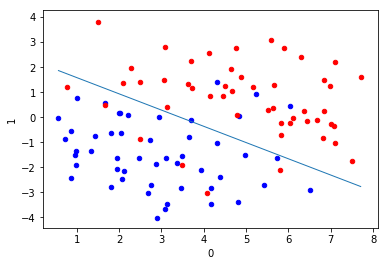

In [8]:
ax = plt.axes()

x.query('label == 0').plot.scatter(x=0, y=1, ax=ax, color='blue')
x.query('label == 1').plot.scatter(x=0, y=1, ax=ax, color='red')

_xs = np.array([np.min(x.values[:,0]), np.max(x.values[:,0])])
_ys = (lgr_gd.w[0][0] + lgr_gd.w[0][1] * _xs) / (- lgr_gd.w[0][2])
plt.plot(_xs, _ys, lw=1)

# plt.axis([0,8,-5,5])
# lgr_gd.w[0][0]

In [23]:
#将跌到的w带回原式，预测并记录y值
pred_h = lgr_gd.sigmoid(gt_x)
pred_y = []
for i in range(len(pred_h)):
    if pred_h[i][0] > 0.5:
        pred_y.append(1)
    else:
        pred_y.append(0)

In [26]:
#将预测值与y标签比较，计算错误率
error = 0
for i in range(len(pred_h)):
    if pred_y[i] != gt_y[i][0]:
        error += 1
error_rate = error/len(gt_y)
error_rate

0.1111111111111111